<a href="https://colab.research.google.com/github/Pushpa-Harshitha05/Machine-Learning/blob/main/Small_ml_practice_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Small ML project**

 Steps

 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Train test split
 3. Scale the values
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model

.

In [42]:
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv('placement.csv')
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


.

<h1>0. Preprocess + EDA + Feature Selection</h1>


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [45]:
data = data.iloc[:,1:]
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

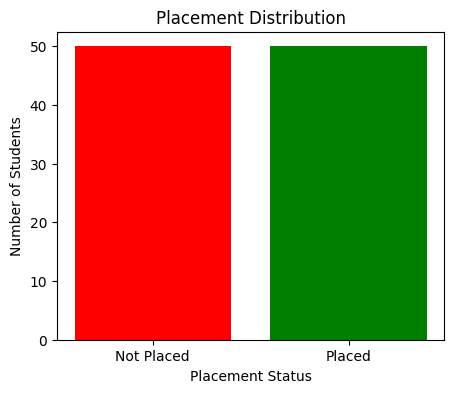

In [47]:
fig, ax = plt.subplots(figsize=(5,4))
placement_counts = data["placement"].value_counts()

# placement_counts = [50,50] - 1d tensor

# Plot bar graph
plt.bar(["Not Placed", "Placed"], placement_counts , color=["red", "green"])
plt.xlabel("Placement Status")
plt.ylabel("Number of Students")
plt.title("Placement Distribution")
plt.show()

In [48]:
not_placed = data[data['placement'] == 0].value_counts().sum()
placed = data[data['placement'] == 1].value_counts().sum()

print(f"The number of not-placed students are: {not_placed}")
print(f"The number of placed students are: {placed}")

The number of not-placed students are: 50
The number of placed students are: 50


In [49]:
# not-placed

notplaced_more_iq = data.query('(placement == 0) and (iq >= 100)').value_counts().shape[0]
notplaced_less_iq = data.query('(placement == 0) and (iq < 100)').value_counts().shape[0]

print(f"Not Placed and IQ >= 100: {notplaced_more_iq}")
print(f"Not Placed and IQ < 100: {notplaced_less_iq}")

print('\n')
# placed

placed_less_iq = data.query('(placement == 1) and (iq < 100)').value_counts().shape[0]
placed_more_iq = data.query('(placement == 1) and (iq >= 100)').value_counts().shape[0]

print(f"Placed and IQ >= 100: {placed_more_iq}")
print(f"Placed and IQ < 100: {placed_less_iq}")

Not Placed and IQ >= 100: 39
Not Placed and IQ < 100: 11


Placed and IQ >= 100: 37
Placed and IQ < 100: 13


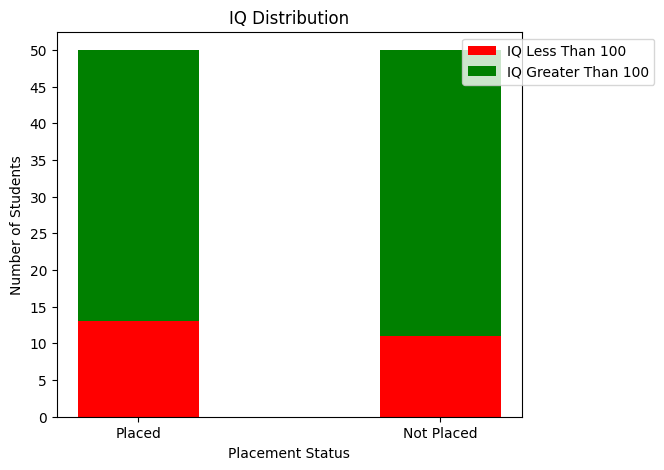

In [50]:
# stacked bar plot of showing iq of placed and not-placed students >= 100 and < 100

containers = ['Placed','Not Placed']
less_iq_bars = [placed_less_iq,notplaced_less_iq]
more_iq_bars = [placed_more_iq,notplaced_more_iq]

fig, ax = plt.subplots(figsize=(6,5))

plt.bar(containers,less_iq_bars, width=0.4, color='red',label='IQ Less Than 100')
plt.bar(containers,more_iq_bars,bottom=less_iq_bars, width=0.4 , color='green', label='IQ Greater Than 100')

plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.title('IQ Distribution')
plt.yticks(np.arange(0,55,5))

plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.show()

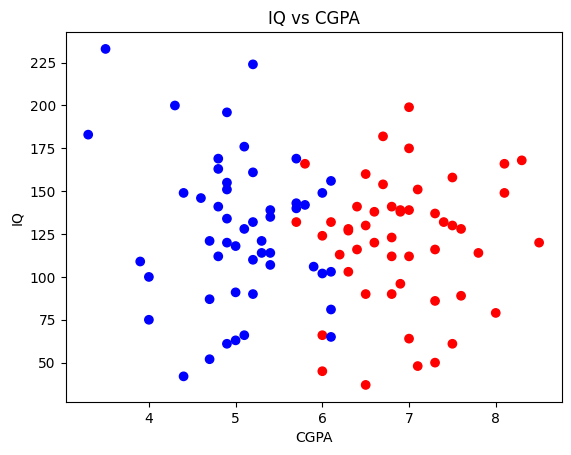

In [51]:
plt.scatter(data['cgpa'],data['iq'],c=data['placement'],cmap='bwr')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('IQ vs CGPA')

plt.show()

# the blue dots represent not placed students and red represents placed students.

.

<h1>1. Extract input and output cols</h1>

In [52]:
#input
x = data[['cgpa','iq']] # or x = data.iloc[:,:-1]
print(x)

#output
y = data['placement']  # or y = data.iloc[:,-1]
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


.

<h1> 2. Train test split</h1>

In [53]:
from sklearn.model_selection import train_test_split

train_test_split(x,y,test_size=0.2)

[    cgpa     iq
 46   5.3  114.0
 42   7.6   89.0
 31   3.9  109.0
 41   5.4  114.0
 83   7.5  130.0
 ..   ...    ...
 7    5.0   63.0
 11   6.9  138.0
 10   6.0   45.0
 53   8.3  168.0
 74   6.7  154.0
 
 [80 rows x 2 columns],
     cgpa     iq
 68   4.0   75.0
 62   6.0  102.0
 30   7.6  128.0
 97   6.7  182.0
 26   7.0  199.0
 50   3.5  233.0
 35   6.8   90.0
 69   8.5  120.0
 58   8.0   79.0
 71   6.1  132.0
 37   8.1  149.0
 93   6.8  112.0
 85   5.8  166.0
 61   7.3  137.0
 73   4.9   61.0
 56   6.1   65.0
 67   5.0  118.0
 87   5.7  132.0
 48   6.6  138.0
 40   4.9  134.0,
 46    0
 42    1
 31    0
 41    0
 83    1
      ..
 7     0
 11    1
 10    1
 53    1
 74    1
 Name: placement, Length: 80, dtype: int64,
 68    0
 62    0
 30    1
 97    1
 26    1
 50    0
 35    1
 69    1
 58    1
 71    1
 37    1
 93    1
 85    1
 61    1
 73    0
 56    0
 67    0
 87    1
 48    1
 40    0
 Name: placement, dtype: int64]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=49)

.

<h1> 3. Scale the values</h1>

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [56]:
x_train = scaler.fit_transform(x_train)   # scaled all the values between -3 and 3.
print(np.min(x_train))
print(np.max(x_train))

x_train

-2.0601068756825502
2.52608343089646


array([[ 0.05696145, -0.44145147],
       [ 0.61118092,  0.8093277 ],
       [ 0.05696145, -0.98100327],
       [-0.77436777, -0.2697759 ],
       [ 0.05696145,  0.2697759 ],
       [ 0.51881101,  0.41692639],
       [-0.95910759, -1.42245475],
       [-1.51332707, -1.93748147],
       [ 1.25777031,  0.2697759 ],
       [ 0.70355083, -0.22072574],
       [ 0.24170127,  0.17167557],
       [ 0.05696145,  0.85837786],
       [-0.03540847,  0.07357525],
       [ 0.88829066,  0.44145147],
       [-0.68199786,  0.        ],
       [-0.77436777,  2.52608343],
       [-0.86673768, -1.3488795 ],
       [ 0.70355083, -0.76027754],
       [-1.14384742,  1.03005344],
       [ 1.62724996, -0.17167557],
       [-0.03540847, -1.86390622],
       [ 1.44251014,  0.17167557],
       [ 0.88829066,  1.32435442],
       [ 1.9043597 ,  0.68670229],
       [ 0.24170127, -0.44145147],
       [ 0.51881101, -0.02452508],
       [-0.86673768,  0.17167557],
       [-0.3125182 ,  1.17720393],
       [-1.32858724,

In [57]:
x_train.std()

1.0

In [58]:
print(type(x_train))

<class 'numpy.ndarray'>


In [59]:
x_test = scaler.transform(x_test)
print(np.min(x_test))
print(np.max(x_test))

print(x_test)

-2.529396108023635
2.746809167576733
[[-1.05147751  0.83385278]
 [-0.95910759 -0.73575246]
 [-0.77436777 -0.76027754]
 [-1.14384742  1.17720393]
 [-0.58962794 -0.34335115]
 [-0.77436777  0.98100327]
 [-0.58962794 -0.17167557]
 [-1.05147751 -0.02452508]
 [ 0.88829066 -0.22072574]
 [-0.12777838 -0.36787623]
 [ 0.79592075 -0.61312705]
 [-0.95910759 -0.07357525]
 [ 0.98066057  0.73575246]
 [ 0.70355083  0.04905016]
 [ 1.35014022  0.22072574]
 [-0.68199786 -0.17167557]
 [ 1.35014022  0.90742803]
 [-1.23621733 -0.83385278]
 [ 1.1654004  -1.74128081]
 [ 1.9043597   1.10362868]
 [-1.14384742  0.49050164]
 [ 0.05696145 -1.37340458]
 [ 0.33407118 -0.12262541]
 [ 0.14933136 -0.19620065]
 [-2.34465628  2.74680917]
 [-0.77436777  0.2697759 ]
 [-1.23621733  0.        ]
 [ 0.79592075  0.41692639]
 [ 0.88829066 -1.39792967]
 [-2.52939611  1.52055507]
 [ 2.08909952  1.15267885]
 [ 0.4264411   0.22072574]
 [-1.51332707  0.68670229]
 [-1.05147751  0.73575246]
 [-0.3125182   0.2697759 ]
 [-1.05147751  1.8

.

<h1>4. Train the model</h1>

In [60]:
# for this binary classification problems (like placed or not-placed) , we use logistic regression.

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

.

<h1>5. Evaluate the model</h1>

In [62]:
from sklearn.metrics import accuracy_score

a = accuracy_score(y_test,y_pred)
a

0.95

In [63]:
from sklearn.metrics import confusion_matrix

b = confusion_matrix(y_test,y_pred)
b

array([[20,  1],
       [ 1, 18]])

In [64]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

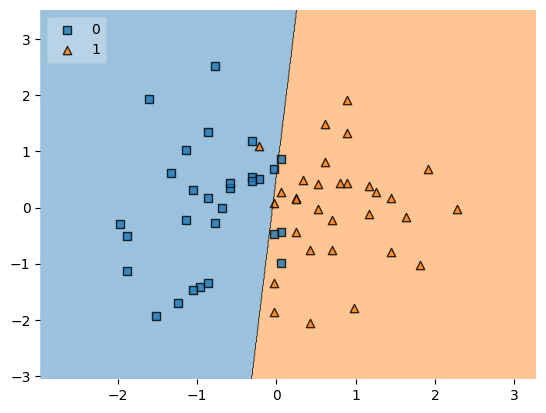

In [65]:
plot_decision_regions(x_train,y_train.values,clf=model,legend = 2)

.

<h1>Exporting the model.</h1>

In [67]:
import pickle    # pickle lib is used to convert an object to file and use it in other environment.

# The pickle library in Python is used for serializing and deserializing objects. Serialization (also called "pickling") converts an object into a byte stream that can be stored in a file or sent over a network, while deserialization (or "unpickling") restores the object from that byte stream.

In [68]:
pickle.dump(model,open('model.pkl','wb'))   # wb - binary write mode
# the file is stored in model.pkl.

.

<h1>Deploying the model</h1>

<h4>We can deploy our ml project using a web application in</h4><h2>Heroku, AWS, GCP(Google cloud platform)</h2>